In [33]:
import pandas as pd
from collections import Counter
from urllib.parse import urlparse
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv("2._gllm-annotation-results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5082 non-null   int64 
 1   doi       5082 non-null   object
 2   file      5082 non-null   object
 3   variable  5082 non-null   object
 4   result    5082 non-null   object
dtypes: int64(1), object(4)
memory usage: 198.6+ KB


In [35]:
df[(df.variable=="Q1_0_Tool-Mentioned")].result.value_counts()

,count
result,
Yes,222
No (unclear),20


In [36]:
ids=df[(df.variable=="Q1_0_Tool-Mentioned")&(df.result=="Yes")].id.values
df_rel=df[df.id.isin(ids)]
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4662 entries, 0 to 5081
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4662 non-null   int64 
 1   doi       4662 non-null   object
 2   file      4662 non-null   object
 3   variable  4662 non-null   object
 4   result    4662 non-null   object
dtypes: int64(1), object(4)
memory usage: 218.5+ KB


In [37]:
df_t=df_rel.pivot(index='id', columns='variable', values='result')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 1868 to 12042
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Q1_0_Tool-Mentioned               222 non-null    object
 1   Q1_1_Tool-Name                    222 non-null    object
 2   Q1_2_Tool-Link                    222 non-null    object
 3   Q1_3_Tool-Reference               222 non-null    object
 4   Q2_0_Tool-Mentioned               222 non-null    object
 5   Q2_1_Tool-Name                    222 non-null    object
 6   Q2_2_Tool-Link                    222 non-null    object
 7   Q2_3_Tool-Reference               222 non-null    object
 8   Q3_1_Approach                     222 non-null    object
 9   Q3_2_Target-specific-Measurement  222 non-null    object
 10  Q3_3_Validation                   222 non-null    object
 11  Q4_1_Opinion-Evaluation           222 non-null    object
 12  Q4_2_Opinion-Target   

In [38]:

print("No link at all in the paper:",len(df_t[df_t["Q1_2_Tool-Link"]=="-"])," papers")
links=df_t[df_t["Q1_2_Tool-Link"]!="-"]["Q1_2_Tool-Link"].values
link_list = [t.lower().split('; ') for t in links]
new_link_list=[]
count_empthy=0
for i in link_list:
  for j in i:
    if j!="-":
      new_link_list.append(j)
    else:
      count_empthy=count_empthy+1
print ("No link also for some of used tools:",count_empthy, "which were in 18 papers")#which were in 18 papers
#dict_of_links = Counter(x for xs in link_list for x in set(xs))
#dict_of_links.most_common()
Counter(new_link_list).most_common()[:10]

No link at all in the paper: 127  papers
No link also for some of used tools: 32 which were in 18 papers


[('https://github.com/google-research/bert', 5),
 ('https://www.nltk.org/', 5),
 ('https://code.google.com/archive/p/word2vec/', 5),
 ('https://nlp.stanford.edu/projects/glove/', 4),
 ('https://fasttext.cc/', 3),
 ('https://www.cs.waikato.ac.nz/ml/weka/', 3),
 ('https://github.com/cjhutto/vadersentiment', 2),
 ('https://textblob.readthedocs.io/en/dev/', 2),
 ('https://keras.io', 2),
 ('https://scikit-learn.org/', 2)]

In [39]:


subdomains=[]
for i in new_link_list:
  #print(urlparse(i))
  #>> ParseResult(scheme='http', netloc='github.com', path='/somethings/anything/', params='', query='', fragment='')
  subdomains.append(urlparse(i).netloc)
Counter(subdomains).most_common()

[('github.com', 33),
 ('nlp.stanford.edu', 9),
 ('doi.org', 7),
 ('scikit-learn.org', 6),
 ('www.nltk.org', 6),
 ('code.google.com', 6),
 ('textblob.readthedocs.io', 4),
 ('huggingface.co', 4),
 ('keras.io', 3),
 ('fasttext.cc', 3),
 ('www.cs.waikato.ac.nz', 3),
 ('www.kaggle.com', 2),
 ('spacy.io', 2),
 ('www.tensorflow.org', 2),
 ('www.techscience.com', 1),
 ('aylien.com', 1),
 ('azure.microsoft.com', 1),
 ('www.python.org', 1),
 ('rapidminer.com', 1),
 ('www.electronjs.org', 1),
 ('alt.qcri.org', 1),
 ('arxiv.org', 1),
 ('dl.acm.org', 1),
 ('www.cfilt.iitb.ac.in', 1),
 ('camel.abudhabi.nyu.edu', 1),
 ('weka.wikispaces.com', 1),
 ('sentistrength.wlv.ac.uk', 1),
 ('wtlab.um.ac.ir', 1),
 ('www.ef.uns.ac.rs', 1),
 ('ieee-dataport.org', 1),
 ('corpustext.com', 1),
 ('medium.com', 1),
 ('towardsdatascience.com', 1),
 ('developer.apple.com', 1),
 ('text-processing.com', 1),
 ('radimrehurek.com', 1),
 ('www.cis.uni-muenchen.de', 1),
 ('weka.sourceforge.io', 1),
 ('christophm.github.io', 1),

In [41]:
df_t["Q5_1_Data-Source"].value_counts()

,count
Q5_1_Data-Source,
Social Media,105
Online Reviews,42
benchmark dataset,29
Social Media; Online Reviews,9
Media,5
Other,5
Social Media; Media,3
Online Reviews; Social Media,3
benchmark dataset; Social Media,3


In [69]:
import re
df_t=df_rel.pivot(index='id', columns='variable', values='result')

clean_dict_source={"online news": "media",
                   re.escape(" (e.g., semeval2013)"): "",
                   re.escape(" (semeval-2017 task 4)"): "",
                   "microblog message":"social media",
                   re.escape("media outlets"):"media",
                   "news headline": "media",
                   "online news outlets":"media",
                   "patient reported outcome measures":"other (patient reported outcome measures)"}
df_t.loc[:,"Q5_1_Data-Source"]=df_t['Q5_1_Data-Source'].str.lower().replace(clean_dict_source, regex=True)
df_t.loc[:,"Q5_1_Data-Source_Other"]=df_t['Q5_1_Data-Source'].apply(lambda x: re.search(r'\((.*?)\)',
                                                                                        x).group(1) if "other (" in x else "-")
df_t.loc[:,"Q5_1_Data-Source"]=df_t["Q5_1_Data-Source"].str.replace(r'\s+\([^()]*\)$', '', regex=True)

df_t.loc[:,"Q5_1_Data-Source"]=df_t["Q5_1_Data-Source"].str.replace("media outlets","media")

In [70]:
df_t["Q5_1_Data-Source"].unique()

array(['social media', 'online reviews', 'social media; online reviews',
       'benchmark dataset', 'media', 'other', 'governmental texts',
       'social media; benchmark dataset',
       'benchmark dataset; social media; media',
       'benchmark dataset; online reviews; social media',
       'media; online reviews', 'benchmark dataset; social media',
       'online reviews; social media', 'personal communication',
       'benchmark dataset; online reviews',
       'social media; media; governmental texts', 'social media; media',
       'online reviews; personal communication', 'media; social media'],
      dtype=object)

In [76]:
#"other or multiple"
#

clean_dict_approach={"lexicon based approach":"dictionaries",
                     "hybrid approach":"other or multiple",
                     re.escape("lexicon-based methods"):"dictionaries",
                     re.escape("lexicon-based"):"dictionaries",
                     "; supervised machine learning":"; classic supervised machine learning",
                     "lexicons":"dictionaries",
                     "lexicon based":"dictionaries",
                     "lexical approach":"dictionaries"}
df_t.loc[:,"Q3_1_Approach"]=df_t['Q3_1_Approach'].str.lower().replace(clean_dict_approach, regex=True)
df_t.Q3_1_Approach.unique()
#check papers -> Word Embedding,  Machine Learning

array(['deep learning/embeddings, transformers etc',
       'classic supervised machine learning',
       'classic unsupervised machine learning',
       'classic supervised machine learning; deep learning/embeddings, transformers etc',
       'dictionaries; classic supervised machine learning',
       'deep learning/embeddings, transformers etc; classic supervised machine learning',
       'classic supervised machine learning; classic unsupervised machine learning; deep learning/embeddings, transformers etc',
       'classic supervised machine learning; classic unsupervised machine learning',
       'deep learning/embeddings, transformers etc; classic unsupervised machine learning',
       'classic supervised machine learning; dictionaries',
       'classic supervised machine learning; dictionaries; other or multiple',
       'classic supervised machine learning; word embedding',
       'dictionaries; machine learning; classic supervised machine learning'],
      dtype=object)

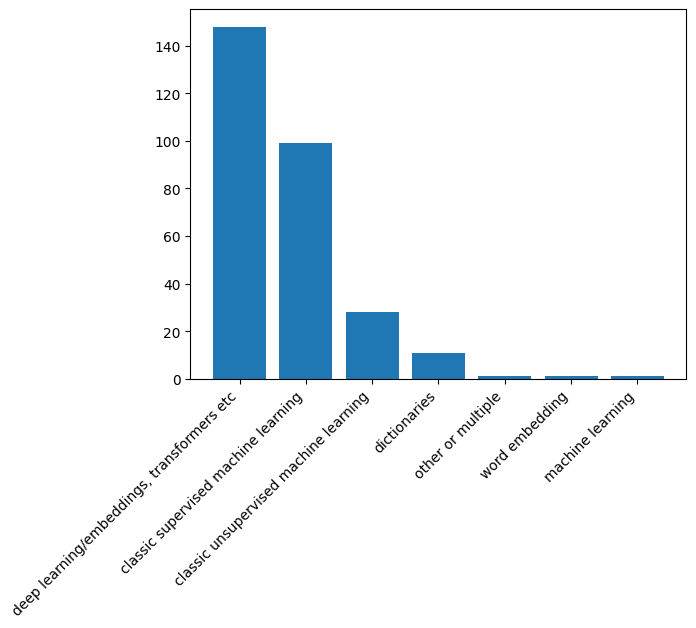

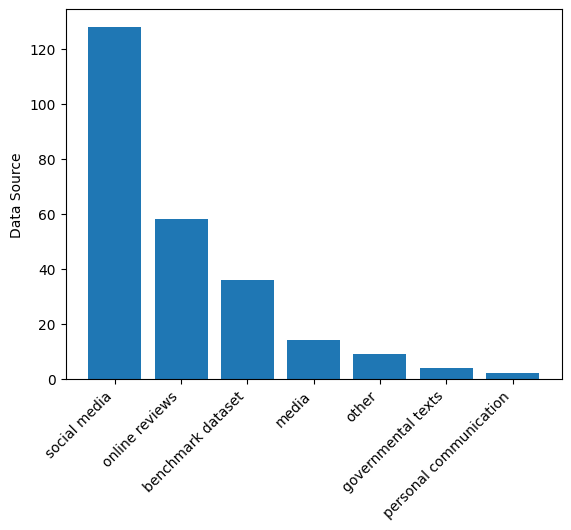

In [77]:

#===========approach
#Answers:
#-Dictionaries
#-Classic Supervised Machine Learning (i.e., usually bag-of-words pre-processing, no deep learning or transformers)
#-Classic Unsupervised Machine Learning (e.g., topic modeling)
#-Deep learning/Embeddings, Transformers etc
#-Proprietary and unknown to us (ie a business secret)
#-Unclear
#-Other or multiple (leads to write in question)

approach=df_t.Q3_1_Approach.values#_counts()
approach_list = [t.lower().split('; ') for t in approach]
dict_of_approach = Counter(x for xs in approach_list for x in set(xs))
dict_of_approach.most_common()


plt.bar(dict_of_approach.keys(), dict_of_approach.values())
plt.xticks(rotation=45, ha='right')
plt.show()
#==========source
#Answers:
#-benchmark dataset (e.g., SemEval2013)
#-Social Media
#-Media
#-Governmental texts
#-Online Reviews
#-Personal Communication (e.g., emails, messenger texts)
#-Other (write in)

source=df_t["Q5_1_Data-Source"].values#_counts()
source_list = [t.lower().split('; ') for t in source]
dict_of_source = Counter(x for xs in source_list for x in set(xs))
#dict_of_source.most_common()

plt.bar(dict_of_source.keys(), dict_of_source.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel("Data Source")
plt.show()


#language,country - small adjusements needed




In [73]:
df_t

variable,Q1_0_Tool-Mentioned,Q1_1_Tool-Name,Q1_2_Tool-Link,Q1_3_Tool-Reference,Q2_0_Tool-Mentioned,Q2_1_Tool-Name,Q2_2_Tool-Link,Q2_3_Tool-Reference,Q3_1_Approach,Q3_2_Target-specific-Measurement,...,Q4_2_Opinion-Target,Q5_0_Data-Mentioned,Q5_1_Data-Source,Q5_2_Data-Language,Q5_3_Data-Country,Q5_4_Dataset-Name,Q5_5_Other-Dataset-Name,Q5_6_Dataset-Link,Q5_7_Dataset-Reference,Q5_1_Data-Source_Other
id,,,,,,,,,,,,,,,,,,,,,
1868,Yes,BERT; M-BERT; Naive Bayes Classifier; Random F...,-,-,Yes,BERT; M-BERT; Naive Bayes Classifier; Random F...,-,-,"Deep learning/Embeddings, Transformers etc",Yes,...,tweets about Russo-Ukrainian war,Yes,social media,English; Hindi; Icelandic; Ukrainian; Thai; Gr...,-,Russo-Ukrainian-War-Dataset,-,https://github.com/onkar2002406/Russo-Ukrainia...,-,-
1869,Yes,Naïve Bayes; SVM; Random Forest,-,-,Yes,Naïve Bayes; SVM; Random Forest,-,-,Classic Supervised Machine Learning,No (unclear),...,Twitter posts,Yes,social media,English,-,-,-,-,-,-
1874,Yes,Stanford NLP Parser,-,-,Yes,SentiWordNet; Semantic Role Labeling (SRL); SW...,-,-,"Deep learning/Embeddings, Transformers etc",Yes,...,"Government schemes such as Digital India, Make...",Yes,social media,English,India,-,-,-,-,-
1875,Yes,TF-IDF; Bag of Words; Naïve Bayes; SVM; Logist...,-,-,Yes,C-LSTM; S-LSTM; RNN; LSTM; CNN-LSTM; GloVe; Bi...,-,-,Classic Supervised Machine Learning,No (unclear),...,musical instruments,Yes,online reviews,English,-,Amazon meta-data repository,-,-,-,-
1877,Yes,ROS-NCL; SMOTE-ENN; SMOTE-Tomek,-,-,Yes,SMOTE; ENN; Tomek Links; SMOTE-RkNN; CSMOUTE; ...,-,-,"Deep learning/Embeddings, Transformers etc",No (unclear),...,"social, economic, and environmental dimensions...",Yes,social media,Indonesian,Indonesia,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12033,Yes,Bi-directional LSTM-CNN,https://doi.org/10.1007/s10772-020-09716-9,-,No (unclear),IRRELEVANT,IRRELEVANT,IRRELEVANT,"Deep learning/Embeddings, Transformers etc",No (unclear),...,social media texts,Yes,benchmark dataset,English,-,SST-1 Stanford Sentiment Treebank,-,-,-,-
12034,Yes,KLOSURE,-,-,No (unclear),IRRELEVANT,IRRELEVANT,IRRELEVANT,Classic Supervised Machine Learning,Yes,...,Knee condition; Knee pain; Knee rehabilitation...,Yes,other,English,UK,-,KLOG responses,-,-,patient reported outcome measures
12040,Yes,Weka; Tweepy,-,"M. Hall, E. Frank, G. Holmes, B. Pfahringer, P...",Yes,Naive Bayes Classifier; Support Vector Machine,-,-,Classic Supervised Machine Learning,No (unclear),...,Presidential Election,Yes,social media,Indonesian,Indonesia,-,-,-,-,-
